# 1 Google Play Store Apps and Reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

1. apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

2. user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

<img src = "https://assets.datacamp.com/production/project_619/img/google_play_store.png">

### 1.1 Import the Software Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Read the Apps Dataset

In [4]:
df = pd.read_csv('datasets/apps.csv')

### 1.3 Print the first five rows

In [3]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Output :-

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1.4 Drop the Unnamed: 0 Column

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Output

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 1.5 Print the Number of rows and columns

In [5]:
df.shape

(9659, 13)

In [5]:
# Output :-

(9659, 13)

### 1.6 Print the Basic Information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


In [6]:
# Output :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


### 1.7 Check for the Duplicated Values

- If there are duplicated values, then drop them.

In [7]:
df.duplicated().sum()

0

In [7]:
# Output :-

0

### 1.8 Check for the Missing Values

- Just check.
- How many missing values for each column?

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [8]:
# Output :-

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# 2 Data Cleaning

### 2.1 Drop the missing data from Current ver and Android Ver

- If you want to impute them, it is ok.

In [9]:
df.dropna(subset=['Current Ver','Android Ver'], inplace=True)
df.isnull().sum()

App                  0
Category             0
Rating            1459
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [9]:
# Output :-

App                  0
Category             0
Rating            1459
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

### 2.2 Handle the missing data from Size

- First Check the distribution of the size variable using matplotlib.
- Second choose the best method to impute the data.
- Lastly, Check the distribution again.

<Axes: >

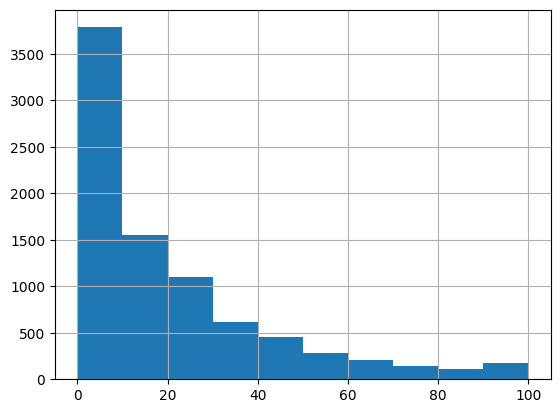

In [10]:
df['Size'].hist()

<Axes: >

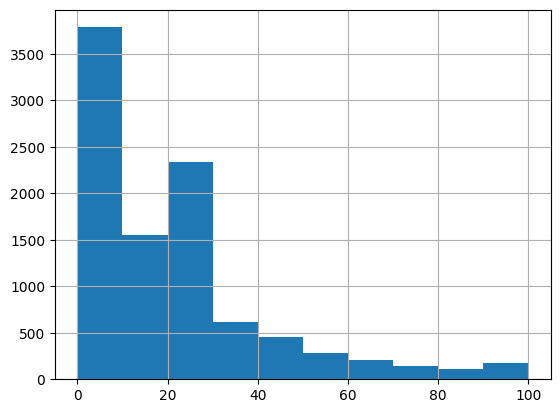

In [11]:
df['Size'].fillna(df['Size'].mean(), inplace=True)
df['Size'].hist()

In [12]:
df.isnull().sum()

App                  0
Category             0
Rating            1459
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [10]:
# Output :-

App                  0
Category             0
Rating            1459
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

### 2.3 Handle the missing data from Rating

- Because it is a rating feature, there are a lot of methods we can do to impute this feature, such as using another data that contains the reviews (every rating for each app) then analyze the sentiment using NLP, or do another methods (you can search for this situation).
- But, now choose the suitable method for imputation that is easy and good.

In [14]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
# Output :-

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### 2.4 Check the values of both Installs and Price columns

- What did you notice??
- List three notifications for both columns (maybe shared notifications).

In [15]:
df['Installs'].value_counts()


1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [12]:
# Output :-

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [16]:
df['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [13]:
# Output :-

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

In [ ]:
# i notice that :
Install column: 
    The apps that have a huge number of installs are very Low.
    The apps that have low installs are medium.
    The apps that have a large number of installs are the Most. 
Price column:
    Most apps are free.
    Many apps have a low price.
    Few apps have a high price.


### 2.5 Check the values for each of the object data type column

- Do not check the Installs and Price columns, we have did this before.
- Make a list that contains the columns that are good to stay as an object.
- Make a list that contains list the columns that are need to convert to categorical.
- Make a list that contains list the columns that are need to convert to Integers.
- Make a list that contains list the columns that are need to convert to Date.

In [17]:
object_columns = df.select_dtypes(include=['object'])
for col in object_columns:
        print(df[col].value_counts())

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      25

In [ ]:
# Make a list that contains the columns that are good to stay as an object.
obj_list=['App' , 'Current Ver' , 'Android Ver']
# Make a list that contains list the columns that are need to convert to categorical.
cat_list=['Category' , 'Type' , 'Content Rating' , 'Genres']
# Make a list that contains list the columns that are need to convert to Integers.
int_list=['Installs']
# Make a list that contains list the columns that are need to convert to Date.
date_list=['Last Updated']

### 2.6 Clean the Installs and Price columns

- Remove unwanted characters.

In [18]:
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
pd.to_numeric(df['Installs'], errors='coerce').astype(int)
df['Installs'].value_counts()

C:\Users\dalal\AppData\Local\Temp\ipykernel_16992\361726866.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')


1000000       1416
100000        1112
10000         1029
10000000       937
1000           886
100            709
5000000        607
500000         504
50000          468
5000           467
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [16]:
# Output :-

1000000       1416
100000        1112
10000         1029
10000000       937
1000           886
100            709
5000000        607
500000         504
50000          468
5000           467
10             384
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

In [19]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'].value_counts()


C:\Users\dalal\AppData\Local\Temp\ipykernel_16992\4104465616.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


0         8896
0.99       143
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [17]:
# Output :-

0         8896
0.99       143
2.99       124
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: Price, Length: 92, dtype: int64

### 2.7 Convert the data type of each object data type columns

- That is including Installs and Price columns.
- Build a function that receives 3 parameters
    1. List of columns you want to convert.
    2. Dataset which in our case the android apps.
    3. Data type that you want to convert to.
- In the function, loop through each column from the list.
- Use df[col].astype(data_type) function to convert the columns.
- Note : The list of date columns need not included in this step.

In [39]:
def convert_col_data_type(lst_of_cols, dataset, data_type):
    for col in lst_of_cols:
        dataset[col] = dataset[col].astype(data_type)
    return dataset

lst_of_cols=['App' , 'Current Ver' , 'Android Ver']
convert_col_data_type(lst_of_cols, df, object)

lst_of_cols=['Category' , 'Type' , 'Content Rating' , 'Genres']
convert_col_data_type(lst_of_cols, df, 'category')



,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2.8 Convert the list of date columns into a suitable format.

- Use pd.to_datetime(df[col]) function.

In [43]:
# date_list=['Last Updated']
# df[date_list] = pd.to_datetime(date_list, dayfirst=True ,format='%B %d, %Y')

date_list = ['Last Updated']
df[date_list] = df[date_list].apply(pd.to_datetime)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   category      
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            8432 non-null   float64       
 6   Installs        9659 non-null   object        
 7   Type            9659 non-null   category      
 8   Price           9659 non-null   object        
 9   Content Rating  9659 non-null   category      
 10  Genres          9659 non-null   category      
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(2),

In [20]:
# Output :-

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   category      
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   category      
 9   Genres          9649 non-null   category      
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: category(3), datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 864.0+ KB


# 3 Data Visualization

### 3.1 Plot the distribution for each categories using Bar Chart.

- The figure size is 16 by 8.
- Set the title, x label, and y label.
- Make sure that the names of the categories not overlapped (use xtricks method with some rotation value).

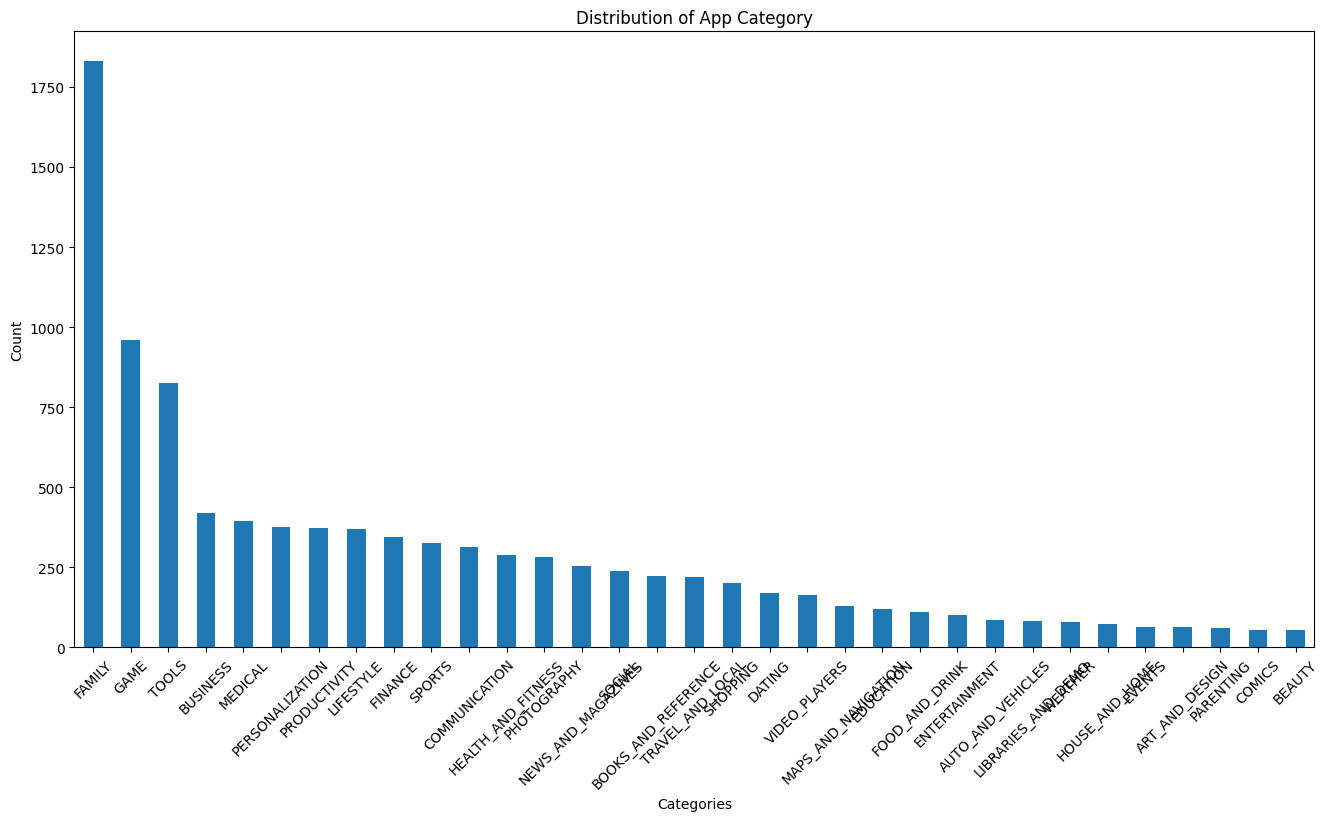

In [15]:
plt.figure(figsize=(16, 8))
category_counts = df.groupby('Category').size().sort_values(ascending=False)
category_counts.plot(kind='bar')
plt.xticks(rotation=45)

plt.title('Distribution of App Category')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.show()

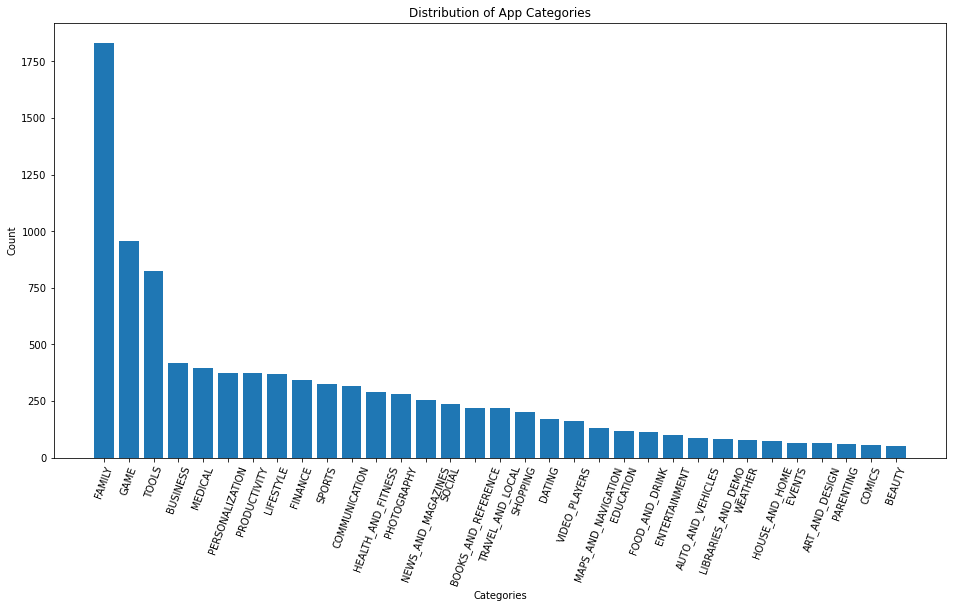

In [21]:
# Output :-

### 3.2 What are the categories has the heighest share of active apps?

- Use Bar Chart.
- Visualize the best 5 categories.

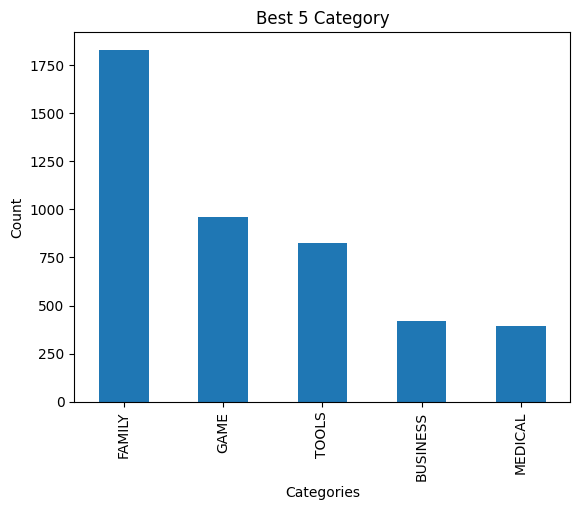

In [17]:
category_counts = df.groupby('Category').size()
top_5_categories = category_counts.sort_values(ascending=False)[:5]
top_5_categories.plot(kind='bar')
plt.title('Best 5 Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [22]:
# Output :-

Number of categories =  33


In [ ]:
# Write your code here

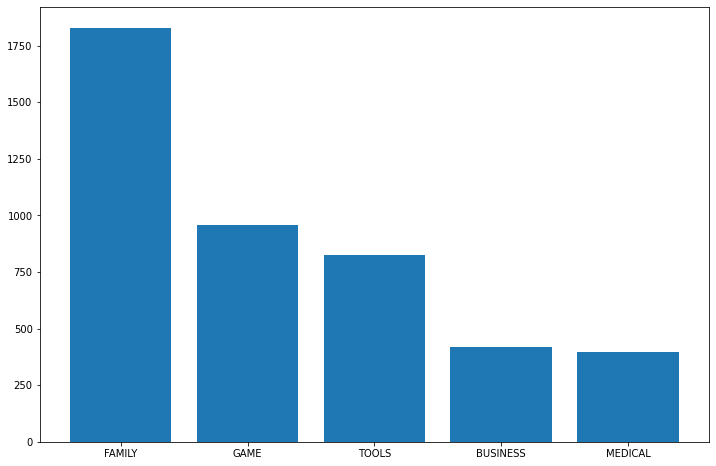

In [23]:
# Output :-

### 3.3 What are the categories has the lowest share of active apps?

- Use Bar Chart.
- Visualize the lowest 5 apps.

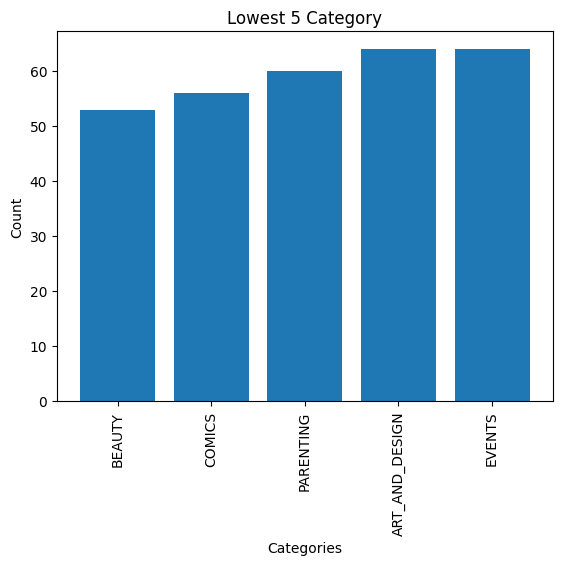

In [27]:
category_counts = df.groupby('Category').size()
lowest_5_categories = category_counts.sort_values(ascending=True)[:5]
lowest_5_categories.plot(kind='bar',width=0.8)
plt.title('Lowest 5 Category')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

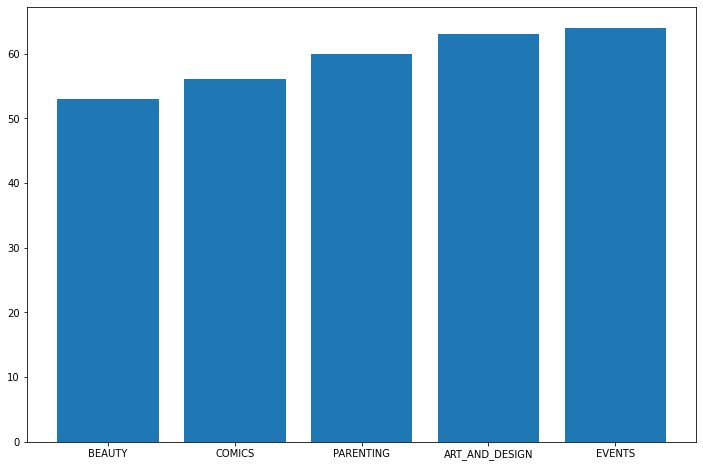

In [24]:
# Output :-

### 3.4 How does the app average rating vary across different categories?

- The figure size is 12 by 12.
- Use Horizontal Bar Chart.
- Set the title, x label, and y label.

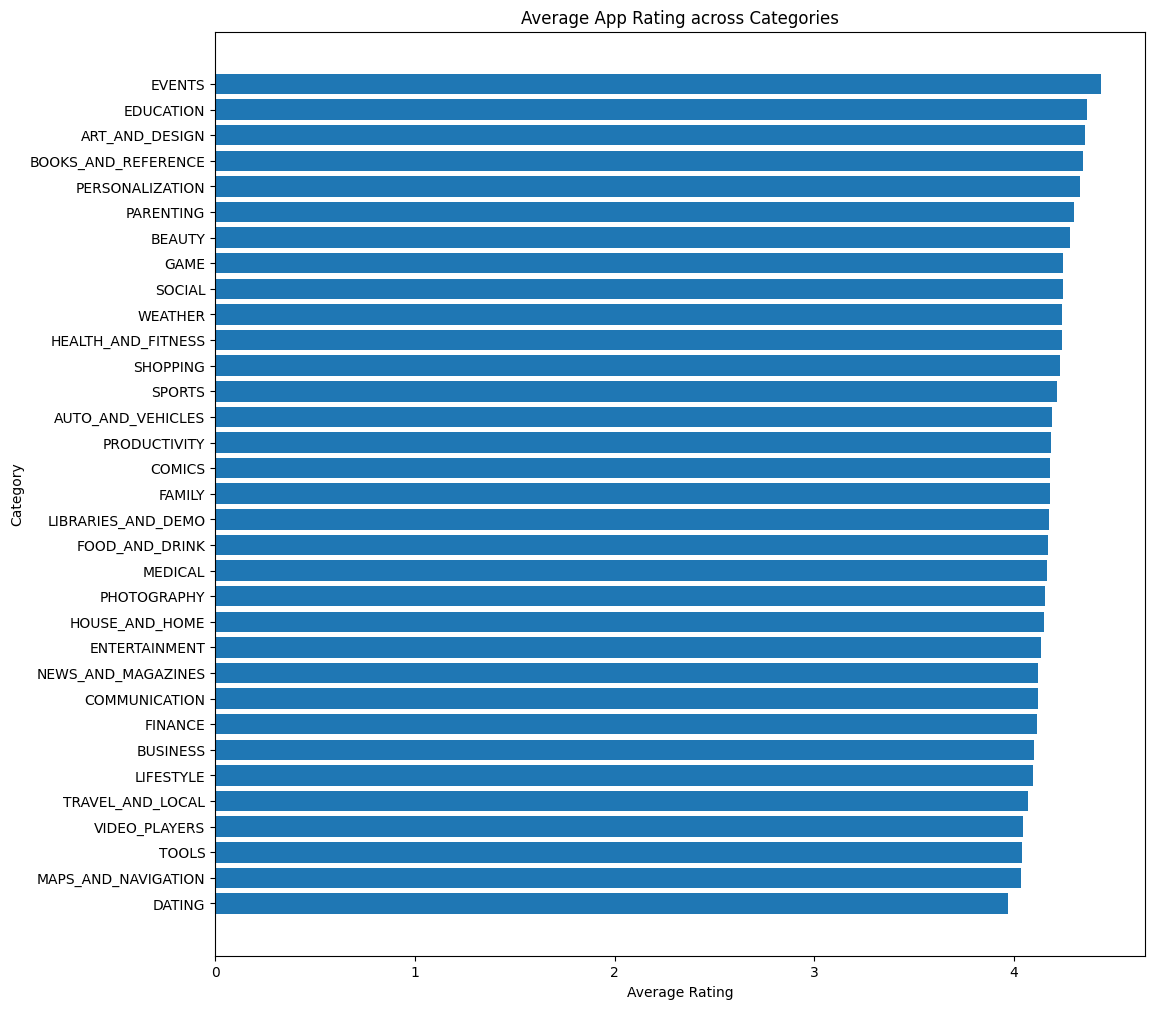

In [28]:
category_ratings = df.groupby('Category')['Rating'].mean()
category_ratings = category_ratings.sort_values()
fig, ax = plt.subplots(figsize=(12, 12))
ax.barh(category_ratings.index, category_ratings.values)
ax.set_title('Average App Rating across Categories')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Category')
plt.show()


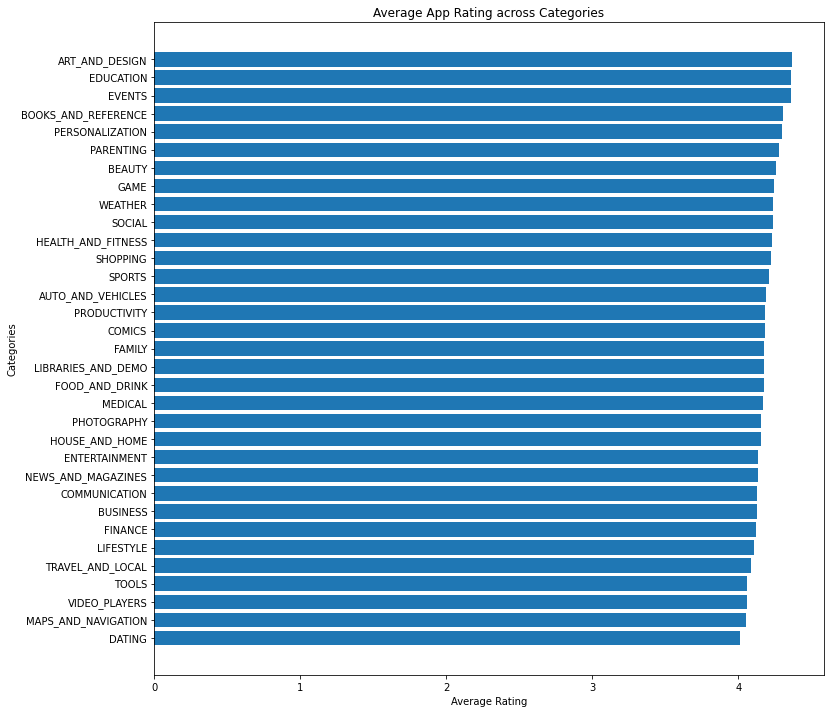

In [25]:
# Output :-

### 3.5 Plot the Average app size for each content rating distribution

- You need to use group by.
- Use Bar Plot.
- Set the width as 0.35.
- Label = 'Average size".
- Show the legend.
- Set the title, x label, and y label.

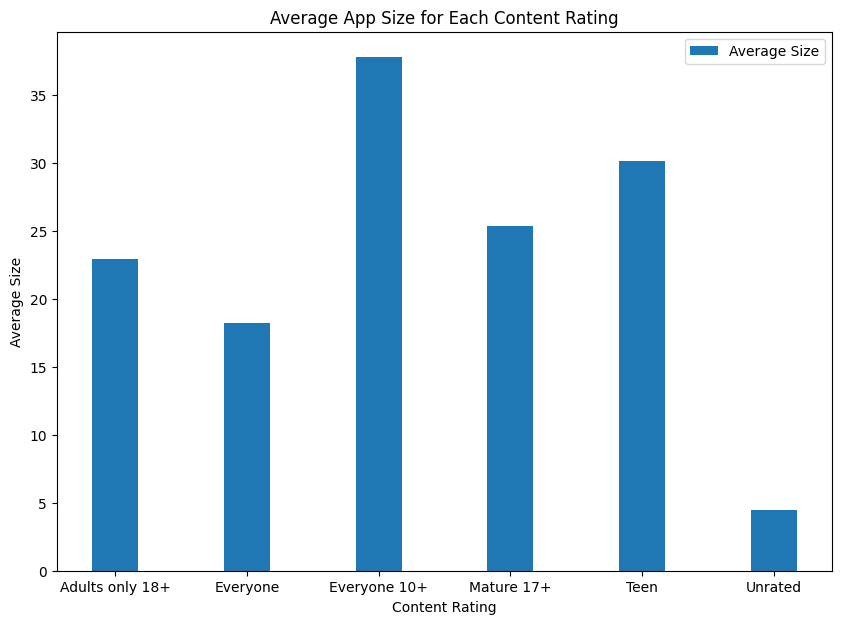

In [29]:
content_rating_sizes = df.groupby('Content Rating')['Size'].mean()
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(content_rating_sizes.index, content_rating_sizes.values, width=0.35)
ax.set_title('Average App Size for Each Content Rating')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Average Size')
ax.legend(['Average Size'])
plt.show()


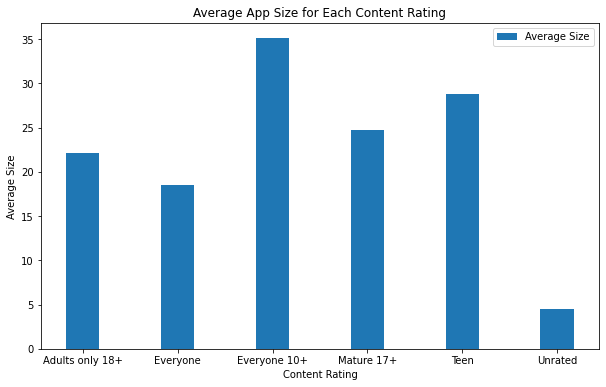

In [26]:
# Output :-

### 3.6 Common content ratings for different categories using a stacked bar chart.

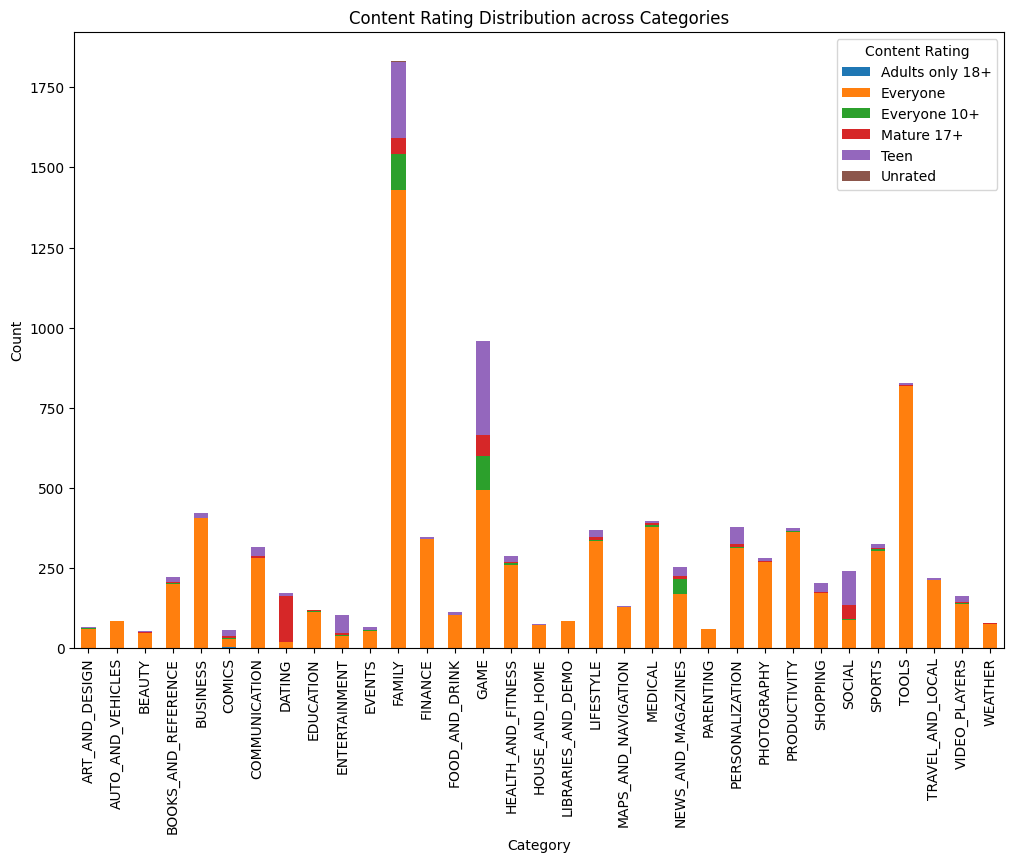

In [30]:
category_content_counts = df.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12, 8))
category_content_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Content Rating Distribution across Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()


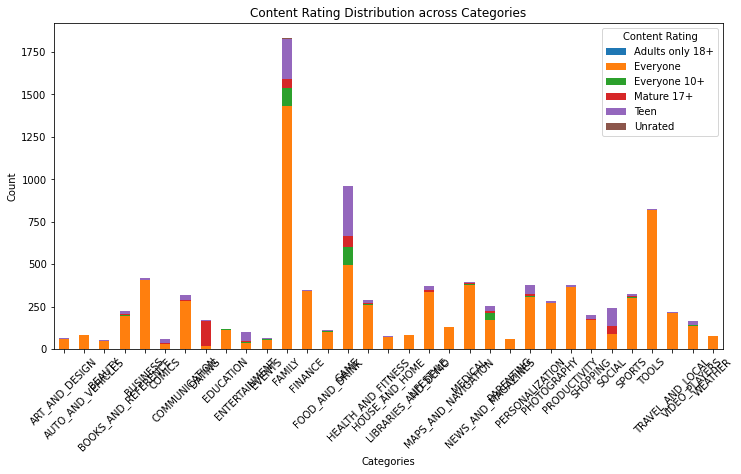

In [27]:
# Output :-

### 3.7 Use area plot to show the change in total reviews over the years.

- Extract the year from your date column as new column "Year".
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The alpha is 0.4.
- Set the title, x label, and y label.

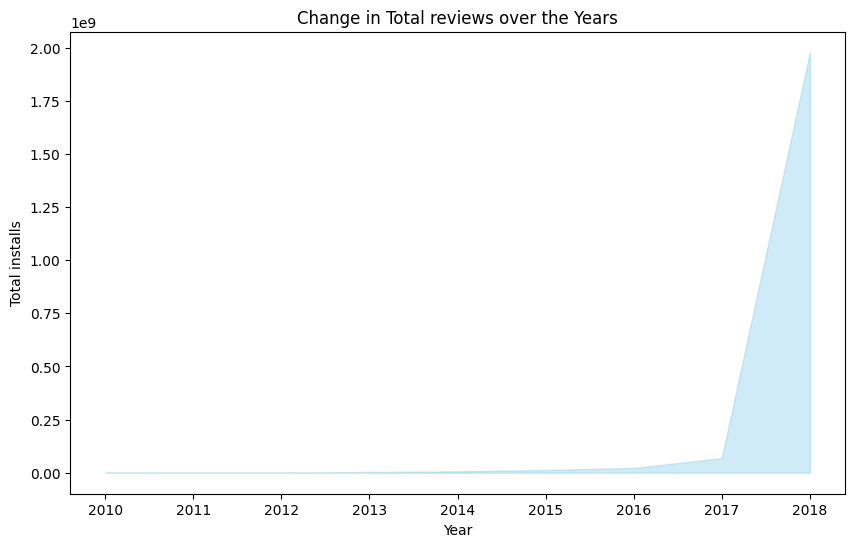

In [46]:
df['Year'] = pd.DatetimeIndex(df['Last Updated']).year
yearly_reviews = df.groupby('Year')['Reviews'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(yearly_reviews.index, yearly_reviews.values, color='skyblue', alpha=0.4)
ax.set_title('Change in Total reviews over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total installs')
plt.show()


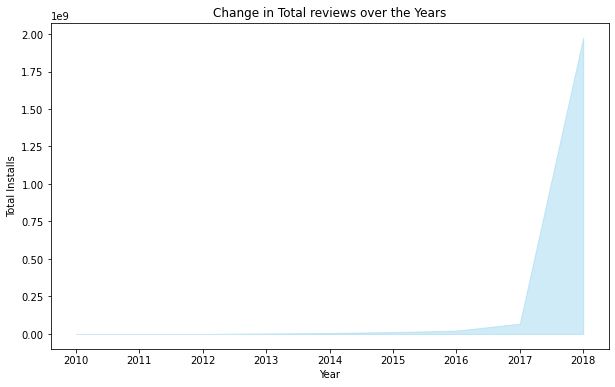

In [29]:
# Output :-

### 3.8 Use line plot to show the total Installs over the years.

- Use the same extracted year column.
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The marker is 'o'.
- Set the title, x label, and y label.

TypeError: no numeric data to plot

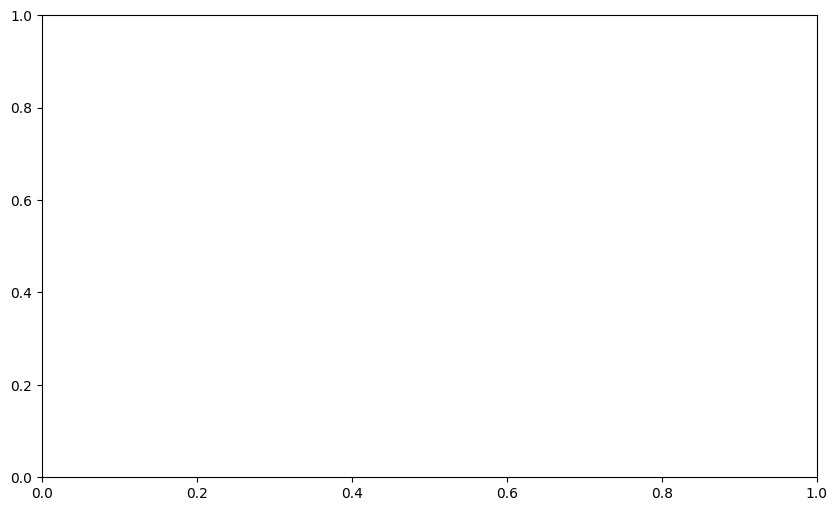

In [8]:
df['Year'] = pd.to_datetime(df['Last Updated']).dt.year
df_grouped = df.groupby('Year')['Installs'].sum()
fig, ax = plt.subplots(figsize=(10, 6))

df_grouped.plot(kind='line', color='skyblue', marker='o', ax=ax)
ax.set_title('Total Installs Over the Years')
ax.set_xlabel('Year')
ax.set_ylabel('Total Installs')

plt.show()


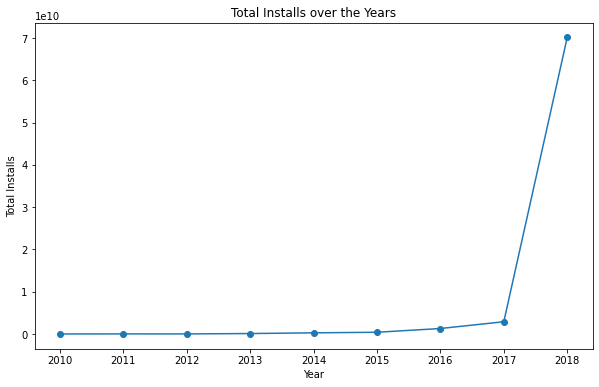

In [30]:
# Output :-

### 3.9 Make a subplot with four histograms

- Two rows and two columns.
- The first hist : Distribution of app sizes.
- The second hist : App rating distribution.
- The third hist : Distribution of app installs.
- The fourth hist : Distribution of app prices.
- Use 30 bins and different colors.

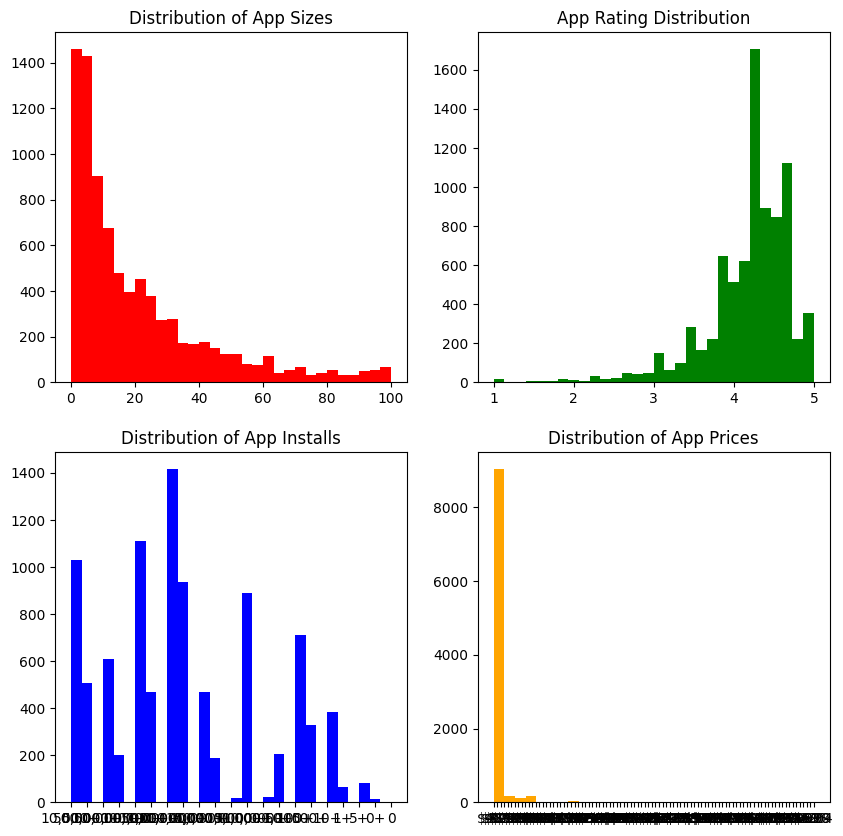

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(df['Size'], bins=30, color='red')
axs[0, 0].set_title('Distribution of App Sizes')

axs[0, 1].hist(df['Rating'], bins=30, color='green')
axs[0, 1].set_title('App Rating Distribution')

axs[1, 0].hist(df['Installs'], bins=30, color='blue')
axs[1, 0].set_title('Distribution of App Installs')

axs[1, 1].hist(df['Price'], bins=30, color='orange')
axs[1, 1].set_title('Distribution of App Prices')

plt.show()


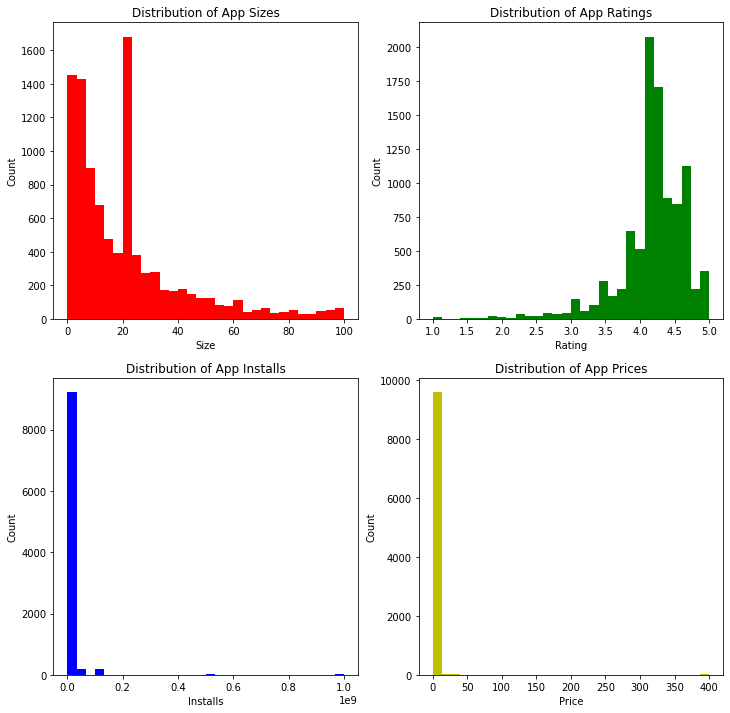

In [31]:
# Output :-

### 3.10 Create a pie chart to visualize the categories.

- Take the top 10 apps.
- autopct parameter is '%1.1f%%'.

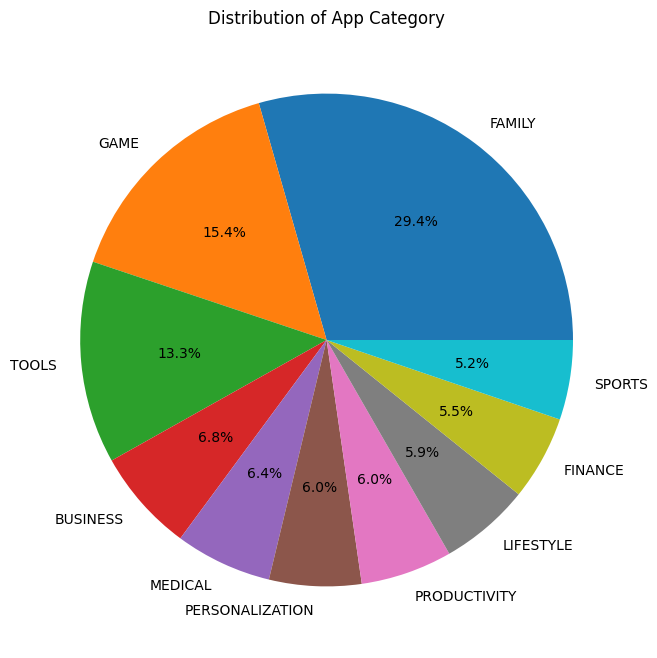

In [90]:
df_top10 = df['Category'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(df_top10, labels=df_top10.index, autopct='%1.1f%%')
ax.set_title('Distribution of App Category')

plt.show()



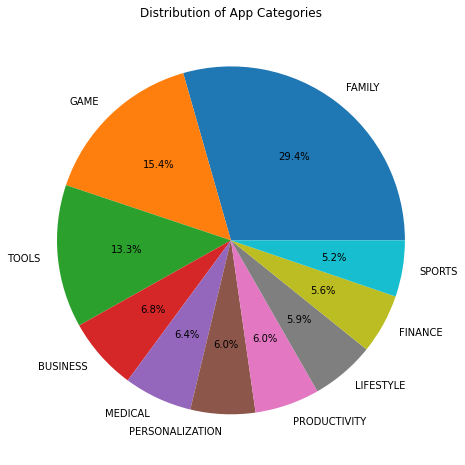

In [32]:
# Output :-

### 3.11 Pie chart of the distribution of content ratings.

- Do not take into account the Unrated value.
- So, the number of values are 5 (Everyone, Teen, Mature 17+, Everyone 10+, Adults only 18+).
- The figure size is 8 by 8.
- Enable the shadow parameter.
- Same as the pie chart before.
- The explode parameter is = [0.25, 0.15, 0, 0, 0].

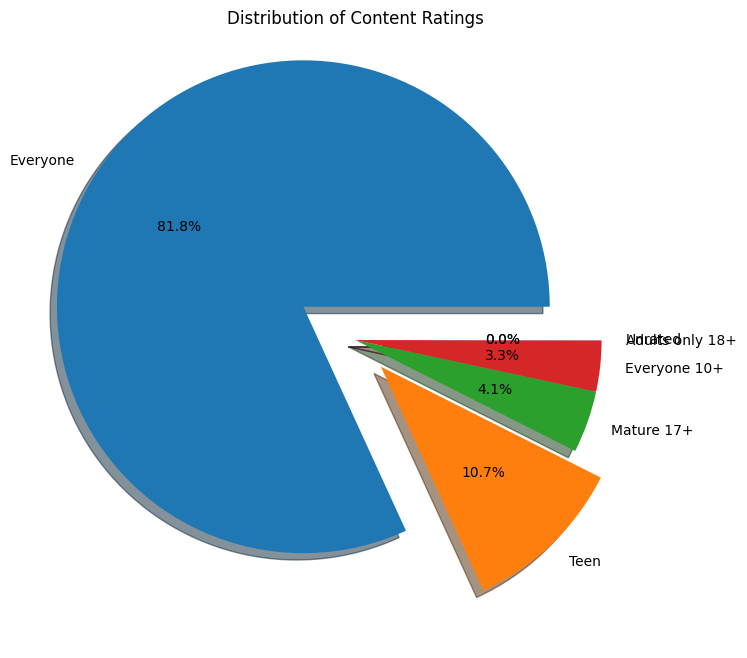

In [96]:
df = df[df['Content Rating'] != 'Unrated']

counts = df['Content Rating'].value_counts()
explodes_list=[0.25, 0.15, 0, 0, 0,0]
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', shadow=True, explode=explodes_list)
ax.set_title('Distribution of Content Ratings')

plt.show()



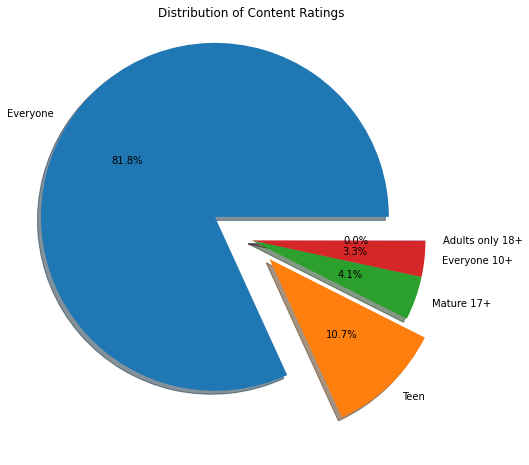

In [33]:
# Output :-

### 3.12 Create two Box plots in the same figure for Type column

- Based on the number of installs.
- The figure size is 10 by 6.
- Log the y axis by using plt.yscale() method.

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

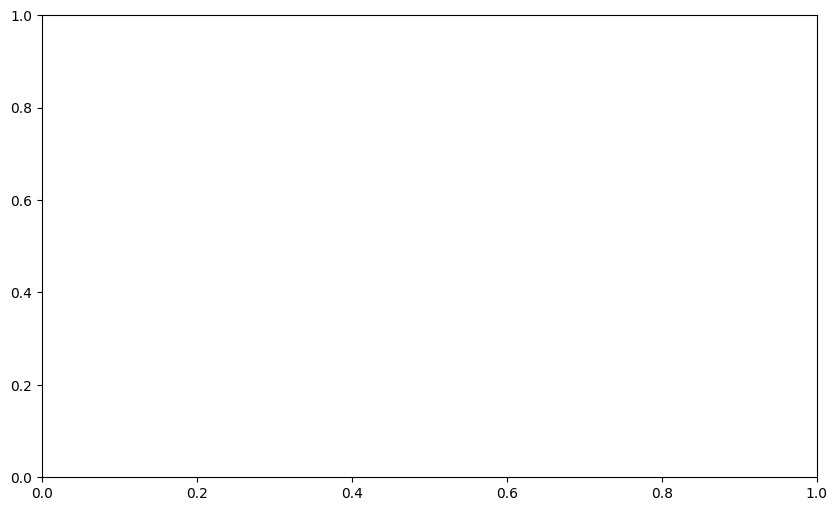

In [125]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(df[df['Type'] == 'Free']['Installs'],labels=['Free'])
ax.boxplot(df[df['Type'] == 'Paid']['Installs'],labels=['Paid'])
plt.yscale('log')

ax.set_title('Number of Downlosds of Paid Apps vs.and Free Apps')
ax.set_ylabel('log number of download')

plt.show()

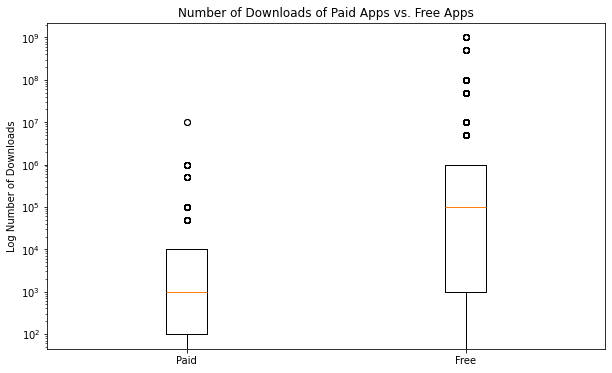

In [34]:
# Output :-